Rede Perceptron de camada simples
====================================

Objetivos:

* Conhecer a Rede Neural Artificial de camada simples (rede Perceptron de
camada única);
* Implementar o algoritmo de treinamento de uma rede de camada simples;
* Utilizar a rede de camada simples para resolver um problema de classificação
de dados com mais de duas classes.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Declaracao de funcoes

In [2]:
#função de ativação
def degree(u):
    return np.where(u < 0, 0, 1)

#implementação do perceptron
def yperceptron(w,b,x, activation_function = degree):
    u = np.dot(w,x) + b                                                           #implementa a multiplicação de todos os valores de w e x
    y = activation_function(u)
    return y[0,:]

def treina_perceptron(W, b, X, yd, alfa, max_epoch, error_tolerance):
    n = np.size(X, 1)                                                             #numero de amostras de X
    SEQ = error_tolerance                                                         #SEQ = somatório dos erros quadraticos
    epoch = 1                                                                     #começa na época 1
    vec_SEQ = []

    while(epoch <= max_epoch and SEQ >= error_tolerance):
      SEQ = 0                                                                     #inicializa SEQ da época
      for i in range(n):                                                          #para cada amostra de X
        y_i = yperceptron(W, b, X[:, i])                                          #determinar a saida do neuronio para a amostra i
        error_i = yd[i] - y_i                                                     #determinar o erro
        W = W + alfa * error_i * X[:, i].T                                         #atualiza o vetor de pesos
        b = b + alfa * error_i                                                     #atualiza o bias
        SEQ = SEQ + error_i ** 2                                                   #acumula o SEQ
      vec_SEQ.append(SEQ.item())                                                   #salva SEQ da epoca  - Essa alteração (.item()) garante que o valor de SEQ seja adicionado à lista como um escalar, eliminando as dimensões extras.
      epoch = epoch + 1

    return (W, b, vec_SEQ)


In [3]:
def plot_SEQ(vec_SEQ):
    plt.figure()
    plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='o')
    plt.title('Soma dos Erros Quadráticos (SEQ) por Época')
    plt.xlabel('Épocas')
    plt.ylabel('SEQ')
    plt.grid(True)
    plt.show()


In [4]:
def geragauss(nc, npc, mc, varc):
    '''
    Gera dados de duas dimensões, aleatórios, com distribuição gaussiana, e a correspondente classificação para cada amostra.

    Entradas: nc,npc,mc,varc
    Retorno: X,yd

    Onde:
    nc = tipo escalar que identifica o número total de classes dos dados
    npc = vetor linha com quantidade de amostras para cada classe de dados
    mc = matriz (2 x nc) com o valor médio de cada dimensão para cada classe
    varc = matriz (2 x nc) com a variância de cada dimensão para cada classe
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
        X = [
                x11 x12 x13 x14 ... x1N
                x21 x22 x23 x24 ... x2N
            ]
    N = total do número de amostras
    yd = vetor linha (1 x N) com a classificação das amostras de X, valores entre 0 e (nc-1). O valor da classe começa em zero.
        yd = [yd1 yd2 yd3 yd4 ... ydnpt ] onde: 0 ≤ ydi < (nc-1)

    '''

    X, yd = make_blobs(
        n_samples= npc,
        n_features = nc,
        centers = mc,
        cluster_std = varc,
        shuffle = False
    )

    X = X.T             #transpoe a matriz para manter o formato de amostra por coluna

    return (X, yd)

In [5]:
def mistura(X, yd):
    '''
    Mistura os dados da matriz X e tambem a classificacao correspondentemente de cada amostra no vetor yd.

    Entradas: X,yd
    Retorno: xp,yp

    Onde:
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
    yd = vetor linha (1 x N) com a classificação numérica dos dados
    xp = matriz (2 x N) com as amostras (por coluna) de todas as classes misturadas
    yp = vetor linha (1 x N) com a classificação numérica dos dados misturada
    N = número total de amostras (soma de todas as classes)

    '''
    X = X.T                   #transpoe a matriz para voltar ao formato amostra por linha antes do embaralhamento
    xp, yp = shuffle(X, yd)
    xp = xp.T                 #transpoe a matriz para manter o formato de amostra por coluna

    return (xp, yp)

In [6]:
def plotadc2d(x, y):                                                            #plota os pontos, recebe x (x1,x2) e y (classificação)
    plt.scatter(x[0, :], x[1, :], marker="o", c=y, s=20)                        #passando y para color gera diferentes cores para cada classe
    plt.xlabel('x1')
    plt.ylabel('x2')

def plotareta(w, b, intervalo, cor, label):                                                 #plota a reta, recebe w (pesos), b (bias) e o intervalo (min, max) para gerar a reta
    x1 = np.linspace(intervalo[0], intervalo[1], 10)                            #gera 10 pontos igualmente espaçados entre intervalo[0] e intervalo[1]
    x2 = -(w[0, 0] * x1 + b) / w[0, 1]                                          #calcula os valores de x2 para cada valor de x1
    plt.plot(x1.T, x2.T, cor, label=label)

def plotagrafico(titulo):
    plt.title(titulo)                                                             #mostra o grafico
    plt.legend()
    plt.show()

In [7]:
def converte_dec_bin(Yd):
  N = Yd.shape[0] #retorna o tamanho desse vetor, N é o numero de colunas de Y
  c = int(np.max(Yd))+1 #retorna a quantidade de classes. A função np.max acha o maior valor que contém dentro do vetor. Converte para inteiro
  Yb = np.zeros((c,N), dtype = int)  #o número de linhas é o número de classes que temos n nosso trabalho e o número de colunas é N, para acompanhar o tamanho de Yd
  for i in range(N):
    num = int(Yd[i])
    Yb[num, i] = 1  #coloca 1 nas linhas corretas para cada coluna
  return Yb


# Função para converter binário para decimal
def converte_bin_dec(Yb):
    indices = np.argmax(Yb, axis=0)
    return indices.reshape(1, -1)

# Rodando experimento

In [8]:
#Define hiperparametros do treinamento
alfa = 0.1
max_epocas = 100
tolerancia = 0.001

## Classes linearmente separaveis

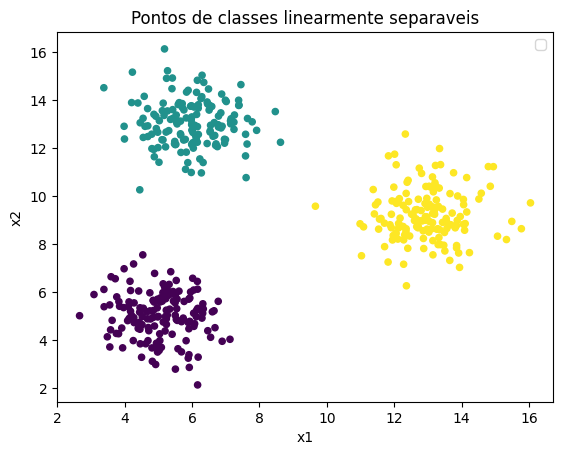

In [9]:
#Classes linearmente separaveis

Xo, ydo = geragauss(
    nc = 3,
    npc = [150,150,150],
    mc = [[5,5], [6,13], [13,9]],
    varc = [[1,1],[1,1],[1,1]]
)

X, yd = mistura(Xo, ydo)

plotadc2d(X,yd)
plotagrafico('Pontos de classes linearmente separaveis')

In [10]:
W1 = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b1 = np.array(np.random.rand(1,1)) * 2 - 1
print(f'w1 = {W1}, b1 = {b1}')

W2 = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b2 = np.array(np.random.rand(1,1)) * 2 - 1
print(f'w2 = {W2}, b2 = {b2}')

W3 = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b3 = np.array(np.random.rand(1,1)) * 2 - 1
print(f'w3 = {W3}, b3 = {b3}')

w1 = [[ 0.67955656 -0.86395988]], b1 = [[0.05305845]]
w2 = [[0.00307039 0.72361602]], b2 = [[-0.47817269]]
w3 = [[-0.64722391 -0.54584318]], b3 = [[0.56021075]]


In [11]:
# Treinar perceptron 1
print('Após treinamento:')
W1, b1, vetor_seq1 = treina_perceptron(W1, b1, X, converte_dec_bin(yd)[0], alfa, max_epocas, tolerancia)
print(f'W1 = {W1}, b1 = {b1}')
# Treinar perceptron 2
W2, b2, vetor_seq2 = treina_perceptron(W2, b2, X, converte_dec_bin(yd)[1], alfa, max_epocas, tolerancia)
print(f'W2 = {W2}, b2 = {b2}')
# Treinar perceptron 3
W3, b3, vetor_seq3 = treina_perceptron(W3, b3, X, converte_dec_bin(yd)[2], alfa, max_epocas, tolerancia)
print(f'W3 = {W3}, b3 = {b3}')

Após treinamento:
W1 = [[-0.5919363  -0.57163695]], b1 = [[7.45305845]]
W2 = [[-4.19379999  4.22165779]], b2 = [[-13.17817269]]
W3 = [[ 3.2137924  -1.24184277]], b3 = [[-18.33978925]]


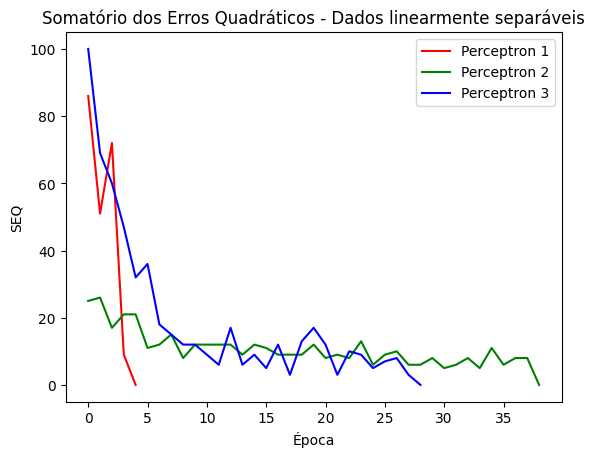

In [12]:
# Plotar o Somatório dos Erros Quadráticos (SEQ) ao longo das épocas para cada perceptron
plt.plot(vetor_seq1, 'r-', label='Perceptron 1')
plt.plot(vetor_seq2, 'g-', label='Perceptron 2')
plt.plot(vetor_seq3, 'b-', label='Perceptron 3')
plt.xlabel('Época')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos - Dados linearmente separáveis')
plt.legend()
plt.show()


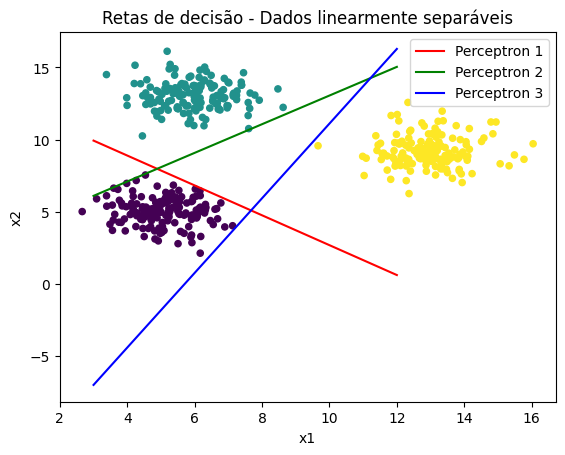

In [13]:
intervalo = [3, 12]

# Plotar pontos
plt.figure()
plotadc2d(X, yd)

# Plotar a reta dos 3 perceptrons
plotareta(W1, b1, intervalo, 'r-', label='Perceptron 1')
plotareta(W2, b2, intervalo, 'g-', label='Perceptron 2')
plotareta(W3, b3, intervalo, 'b-', label='Perceptron 3')

plotagrafico('Retas de decisão - Dados linearmente separáveis')

## Classes não linearmente separaveis

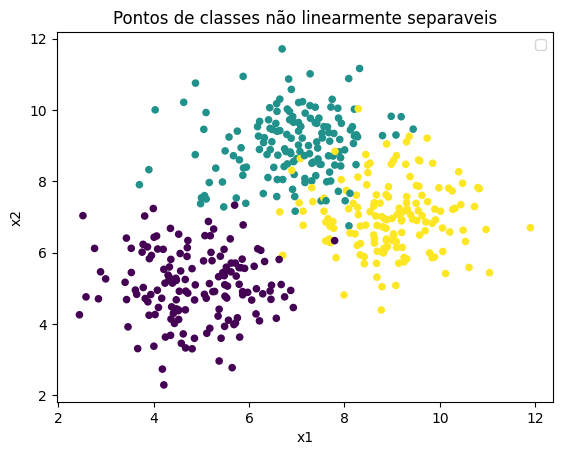

In [14]:
#Classes não linearmente separaveis

Xo, ydo = geragauss(
    nc = 3,
    npc = [150,150,150],
    mc = [[5,5], [7,9], [9,7]],
    varc = [[1,1],[1,1],[1,1]]
)

X, yd = mistura(Xo, ydo)

plotadc2d(X,yd)
plotagrafico('Pontos de classes não linearmente separaveis')

In [15]:
W1 = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b1 = np.array(np.random.rand(1,1)) * 2 - 1
print(f'w1 = {W1}, b1 = {b1}')

W2 = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b2 = np.array(np.random.rand(1,1)) * 2 - 1
print(f'w2 = {W2}, b2 = {b2}')

W3 = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b3 = np.array(np.random.rand(1,1)) * 2 - 1
print(f'w3 = {W3}, b3 = {b3}')

w1 = [[ 0.72364455 -0.08333076]], b1 = [[0.40726317]]
w2 = [[-0.94176647 -0.01148671]], b2 = [[0.24710512]]
w3 = [[-0.05726223 -0.52366709]], b3 = [[-0.06102894]]


In [16]:
# Treinar perceptron 1
print('Após treinamento:')
W1, b1, vetor_seq1 = treina_perceptron(W1, b1, X, converte_dec_bin(yd)[0], alfa, max_epocas, tolerancia)
print(f'W1 = {W1}, b1 = {b1}')
# Treinar perceptron 2
W2, b2, vetor_seq2 = treina_perceptron(W2, b2, X, converte_dec_bin(yd)[1], alfa, max_epocas, tolerancia)
print(f'W2 = {W2}, b2 = {b2}')
# Treinar perceptron 3
W3, b3, vetor_seq3 = treina_perceptron(W3, b3, X, converte_dec_bin(yd)[2], alfa, max_epocas, tolerancia)
print(f'W3 = {W3}, b3 = {b3}')

Após treinamento:
W1 = [[-2.48977149 -2.44372704]], b1 = [[31.80726317]]
W2 = [[-4.04116724  6.89531301]], b2 = [[-38.15289488]]
W3 = [[ 8.92146761 -2.56002131]], b3 = [[-36.86102894]]


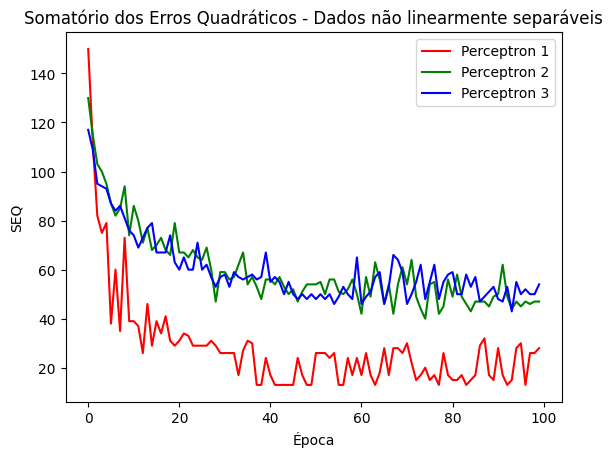

In [19]:
# Plotar o Somatório dos Erros Quadráticos (SEQ) ao longo das épocas para cada perceptron
plt.plot(vetor_seq1, 'r-', label='Perceptron 1')
plt.plot(vetor_seq2, 'g-', label='Perceptron 2')
plt.plot(vetor_seq3, 'b-', label='Perceptron 3')
plt.xlabel('Época')
plt.ylabel('SEQ')
plt.title('Somatório dos Erros Quadráticos - Dados não linearmente separáveis')
plt.legend()
plt.show()

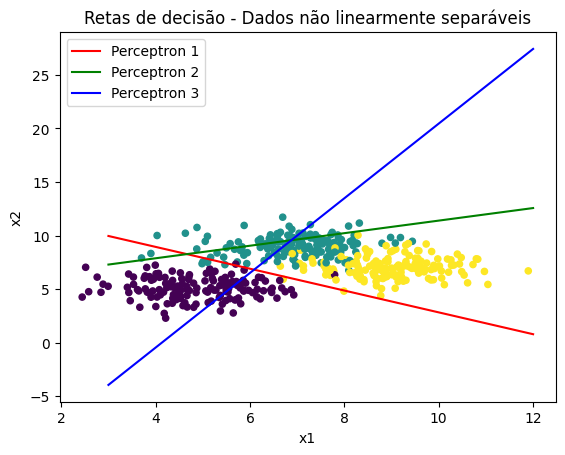

In [18]:
intervalo = [3, 12]

# Plotar pontos
plt.figure()
plotadc2d(X, yd)

# Plotar a reta dos 3 perceptrons
plotareta(W1, b1, intervalo, 'r-', label='Perceptron 1')
plotareta(W2, b2, intervalo, 'g-', label='Perceptron 2')
plotareta(W3, b3, intervalo, 'b-', label='Perceptron 3')

plotagrafico('Retas de decisão - Dados não linearmente separáveis')